# HISTORY

#### Vehicle Detection Image Set

* This dataset is for machine learning process and computer vision steps.

Two labels:

* Non-Vehicles
* Vehicles

17760 images

# PACKAGES AND LIBRARIES

In [6]:
pip install lightbgm

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement lightbgm (from versions: none)
ERROR: No matching distribution found for lightbgm


In [46]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import itertools
from skimage import data, io, filters
import skimage
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
import tensorflow.compat.v2 as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.models import load_model
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# PATH AND LABEL PROCESS

#### MAIN PATH

In [47]:
Main_PNG_Path = Path("./vehicle_detection/data")

#### PNG PATH

In [48]:
PNG_Path = list(Main_PNG_Path.glob(r"*/*.png"))

#### PNG LABELS

In [49]:
PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],PNG_Path))

#### TO SERIES

In [50]:
PNG_Path_Series = pd.Series(PNG_Path,name="PNG").astype(str)
PNG_Labels_Series = pd.Series(PNG_Labels,name="CATEGORY")

#### TO DATAFRAME

In [51]:
Main_Data = pd.concat([PNG_Path_Series,PNG_Labels_Series],axis=1)

In [52]:
print(Main_Data.head(-1))

                                                     PNG      CATEGORY
0         vehicle_detection\data\non-vehicles\extra1.png  non-vehicles
1        vehicle_detection\data\non-vehicles\extra10.png  non-vehicles
2       vehicle_detection\data\non-vehicles\extra100.png  non-vehicles
3      vehicle_detection\data\non-vehicles\extra1000.png  non-vehicles
4      vehicle_detection\data\non-vehicles\extra1001.png  non-vehicles
...                                                  ...           ...
17754     vehicle_detection\data\vehicles\right (94).png      vehicles
17755     vehicle_detection\data\vehicles\right (95).png      vehicles
17756     vehicle_detection\data\vehicles\right (96).png      vehicles
17757     vehicle_detection\data\vehicles\right (97).png      vehicles
17758     vehicle_detection\data\vehicles\right (98).png      vehicles

[17759 rows x 2 columns]


#### REPLACING VALUE NAME

In [53]:
Main_Data["CATEGORY"].replace({"non-vehicles":"no_vehicles"},inplace=True)

In [54]:
print(Main_Data.head(-1))

                                                     PNG     CATEGORY
0         vehicle_detection\data\non-vehicles\extra1.png  no_vehicles
1        vehicle_detection\data\non-vehicles\extra10.png  no_vehicles
2       vehicle_detection\data\non-vehicles\extra100.png  no_vehicles
3      vehicle_detection\data\non-vehicles\extra1000.png  no_vehicles
4      vehicle_detection\data\non-vehicles\extra1001.png  no_vehicles
...                                                  ...          ...
17754     vehicle_detection\data\vehicles\right (94).png     vehicles
17755     vehicle_detection\data\vehicles\right (95).png     vehicles
17756     vehicle_detection\data\vehicles\right (96).png     vehicles
17757     vehicle_detection\data\vehicles\right (97).png     vehicles
17758     vehicle_detection\data\vehicles\right (98).png     vehicles

[17759 rows x 2 columns]


#### SHUFFLING

In [55]:
Main_Data = Main_Data.sample(frac=1).reset_index(drop=True)

In [56]:
print(Main_Data.head(-1))

                                                     PNG     CATEGORY
0                vehicle_detection\data\vehicles\459.png     vehicles
1      vehicle_detection\data\non-vehicles\extra4571.png  no_vehicles
2                vehicle_detection\data\vehicles\924.png     vehicles
3                vehicle_detection\data\vehicles\453.png     vehicles
4      vehicle_detection\data\non-vehicles\image3407.png  no_vehicles
...                                                  ...          ...
17754           vehicle_detection\data\vehicles\3464.png     vehicles
17755     vehicle_detection\data\vehicles\left (478).png     vehicles
17756  vehicle_detection\data\non-vehicles\image3020.png  no_vehicles
17757   vehicle_detection\data\non-vehicles\extra146.png  no_vehicles
17758  vehicle_detection\data\non-vehicles\extra5559.png  no_vehicles

[17759 rows x 2 columns]


# VISUALIZATION

In [57]:
plt.style.use("classic")

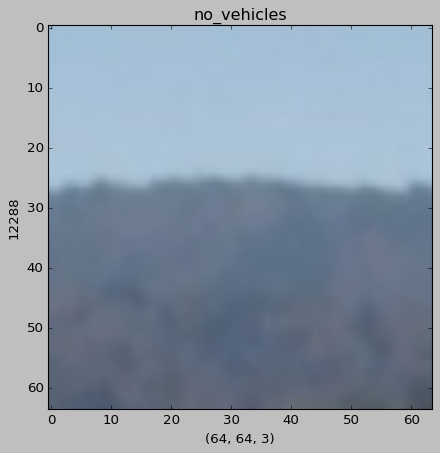

In [58]:
Example_I = cv2.imread(Main_Data["PNG"][44])
Example_I = cv2.cvtColor(Example_I,cv2.COLOR_BGR2RGB)
plt.xlabel(Example_I.shape)
plt.ylabel(Example_I.size)
plt.title(Main_Data["CATEGORY"][44])
plt.imshow(Example_I)

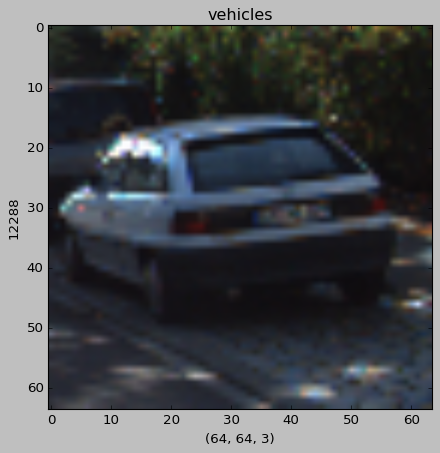

In [59]:
Example_I = cv2.imread(Main_Data["PNG"][2])
Example_I = cv2.cvtColor(Example_I,cv2.COLOR_BGR2RGB)
plt.xlabel(Example_I.shape)
plt.ylabel(Example_I.size)
plt.title(Main_Data["CATEGORY"][2])
plt.imshow(Example_I)

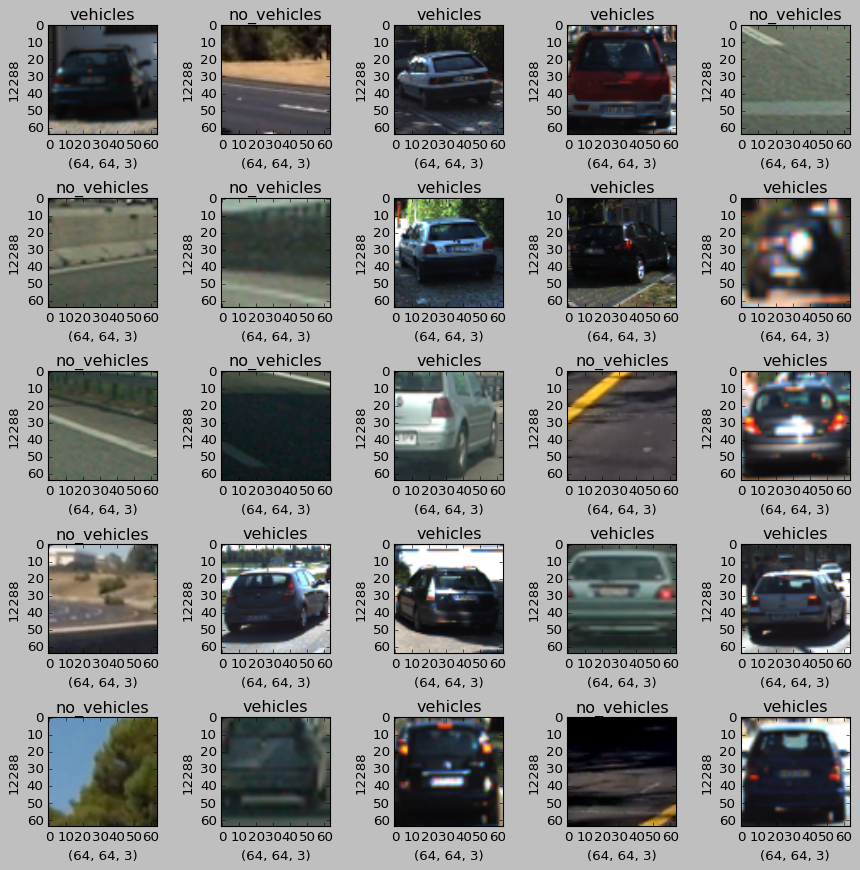

In [60]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(11,11))

for In_Image,sub in enumerate(axis.flat):
    Im_Exp = Main_Data["PNG"][In_Image]
    Exp_Im = cv2.imread(Im_Exp)
    Exp_Im = cv2.cvtColor(Exp_Im,cv2.COLOR_BGR2RGB)
    sub.set_xlabel(Exp_Im.shape)
    sub.set_ylabel(Exp_Im.size)
    sub.set_title(Main_Data["CATEGORY"][In_Image])
    sub.imshow(Exp_Im)
plt.tight_layout()
plt.show()

In [61]:
Non_V_Img = Main_Data[Main_Data["CATEGORY"] == "no_vehicles"]
V_Img = Main_Data[Main_Data["CATEGORY"] == "vehicles"]

Non_V_Img = Non_V_Img.reset_index()
V_Img = V_Img.reset_index()

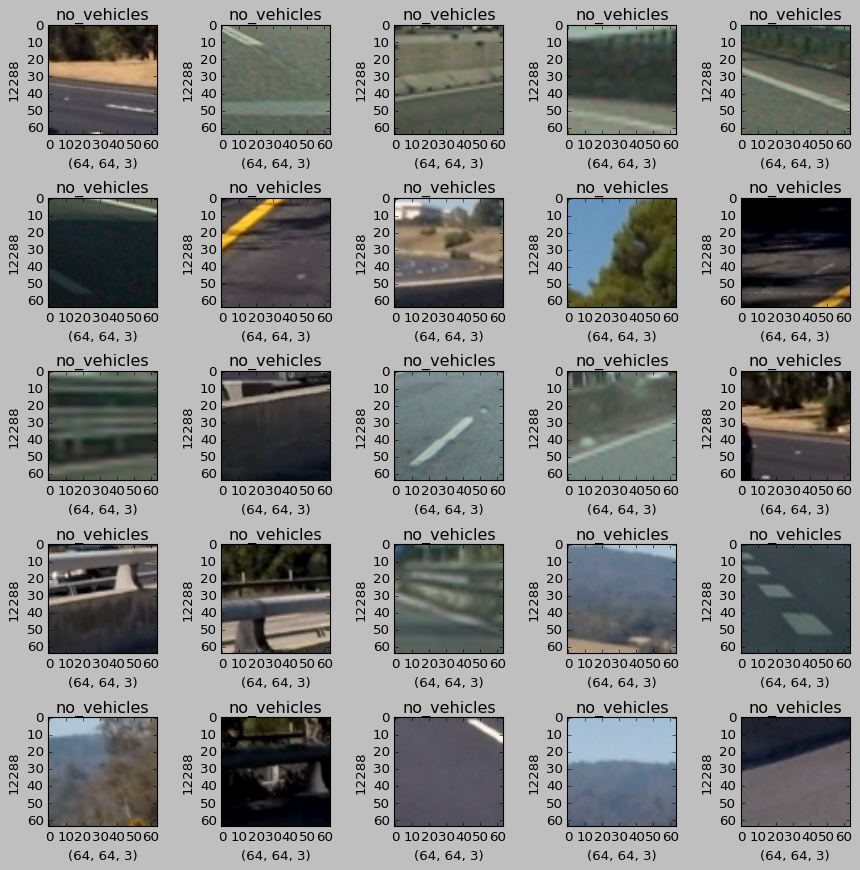

In [62]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(11,11))

for In_Image,sub in enumerate(axis.flat):
    Im_Exp = Non_V_Img["PNG"][In_Image]
    Exp_Im = cv2.imread(Im_Exp)
    Exp_Im = cv2.cvtColor(Exp_Im,cv2.COLOR_BGR2RGB)
    sub.set_xlabel(Exp_Im.shape)
    sub.set_ylabel(Exp_Im.size)
    sub.set_title(Non_V_Img["CATEGORY"][In_Image])
    sub.imshow(Exp_Im)
plt.tight_layout()
plt.show()

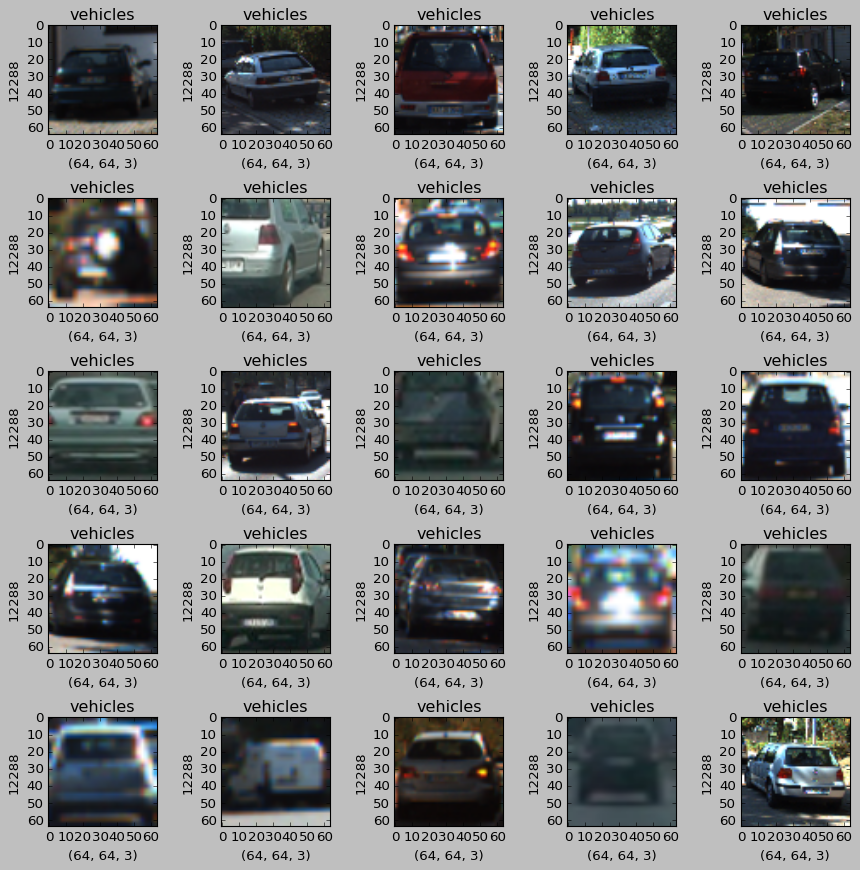

In [63]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(11,11))

for In_Image,sub in enumerate(axis.flat):
    Im_Exp = V_Img["PNG"][In_Image]
    Exp_Im = cv2.imread(Im_Exp)
    Exp_Im = cv2.cvtColor(Exp_Im,cv2.COLOR_BGR2RGB)
    sub.set_xlabel(Exp_Im.shape)
    sub.set_ylabel(Exp_Im.size)
    sub.set_title(V_Img["CATEGORY"][In_Image])
    sub.imshow(Exp_Im)
plt.tight_layout()
plt.show()

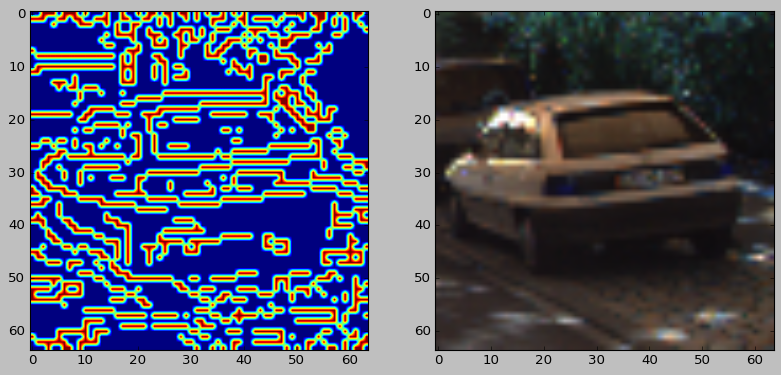

In [64]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

E_IMG = cv2.imread(V_Img["PNG"][1])
C_IMG = cv2.Canny(E_IMG,10,85)

axis[0].imshow(C_IMG)
axis[1].imshow(E_IMG)

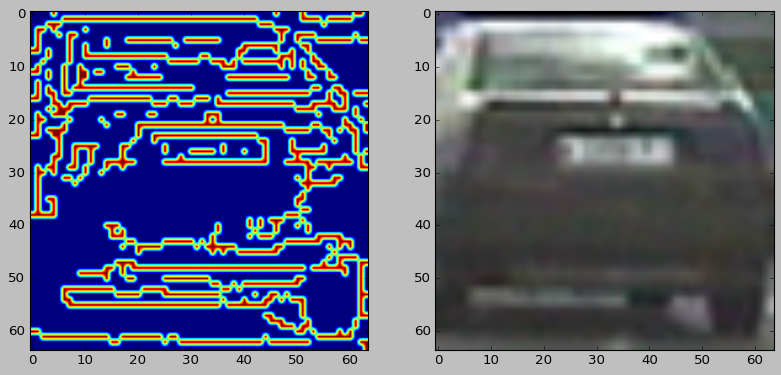

In [65]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

E_IMG = cv2.imread(V_Img["PNG"][100])
C_IMG = cv2.Canny(E_IMG,10,85)

axis[0].imshow(C_IMG)
axis[1].imshow(E_IMG)

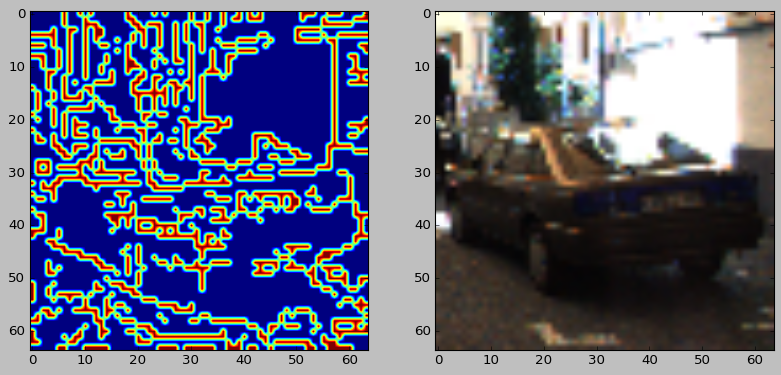

In [66]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

E_IMG = cv2.imread(V_Img["PNG"][147])
C_IMG = cv2.Canny(E_IMG,10,85)

axis[0].imshow(C_IMG)
axis[1].imshow(E_IMG)

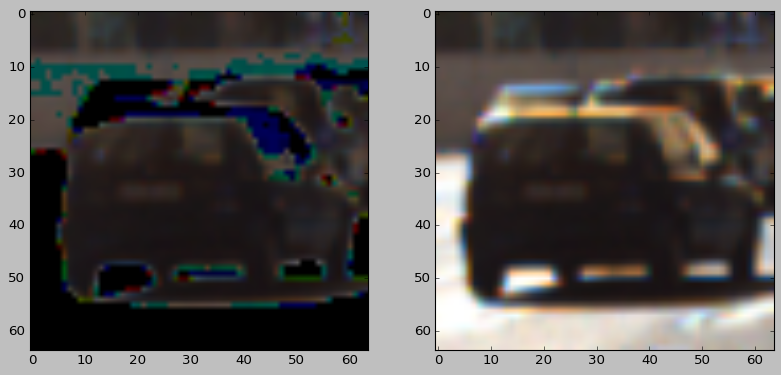

In [67]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

E_IMG = cv2.imread(V_Img["PNG"][47])
_,Threshold_I = cv2.threshold(E_IMG,90,255,cv2.THRESH_TOZERO_INV)


axis[0].imshow(Threshold_I)
axis[1].imshow(E_IMG)

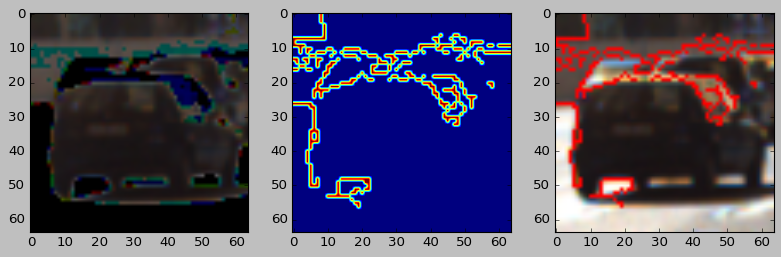

In [68]:
figure,axis = plt.subplots(nrows=1,ncols=3,figsize=(12,12))

E_IMG = cv2.imread(V_Img["PNG"][47])
_,Threshold_I = cv2.threshold(E_IMG,90,255,cv2.THRESH_TOZERO_INV)
C_IMG = cv2.Canny(Threshold_I,90,450)
contours,_ = cv2.findContours(C_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
Draw_Img = cv2.drawContours(E_IMG,contours,-1,(255,0,0),1)


axis[0].imshow(Threshold_I)
axis[1].imshow(C_IMG)
axis[2].imshow(E_IMG)

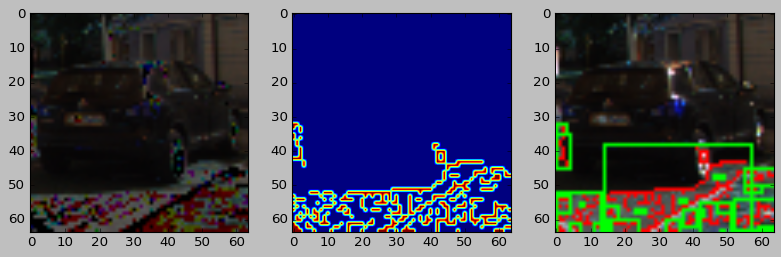

In [69]:
figure,axis = plt.subplots(nrows=1,ncols=3,figsize=(12,12))

E_IMG = cv2.imread(V_Img["PNG"][4])
_,Threshold_I = cv2.threshold(E_IMG,90,255,cv2.THRESH_TOZERO_INV)
C_IMG = cv2.Canny(Threshold_I,90,450)
contours,_ = cv2.findContours(C_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
Draw_Img = cv2.drawContours(E_IMG,contours,-1,(255,0,0),1)

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(Draw_Img,(x,y),(x+w,y+h),(0,255,0),1)

axis[0].imshow(Threshold_I)
axis[1].imshow(C_IMG)
axis[2].imshow(E_IMG)

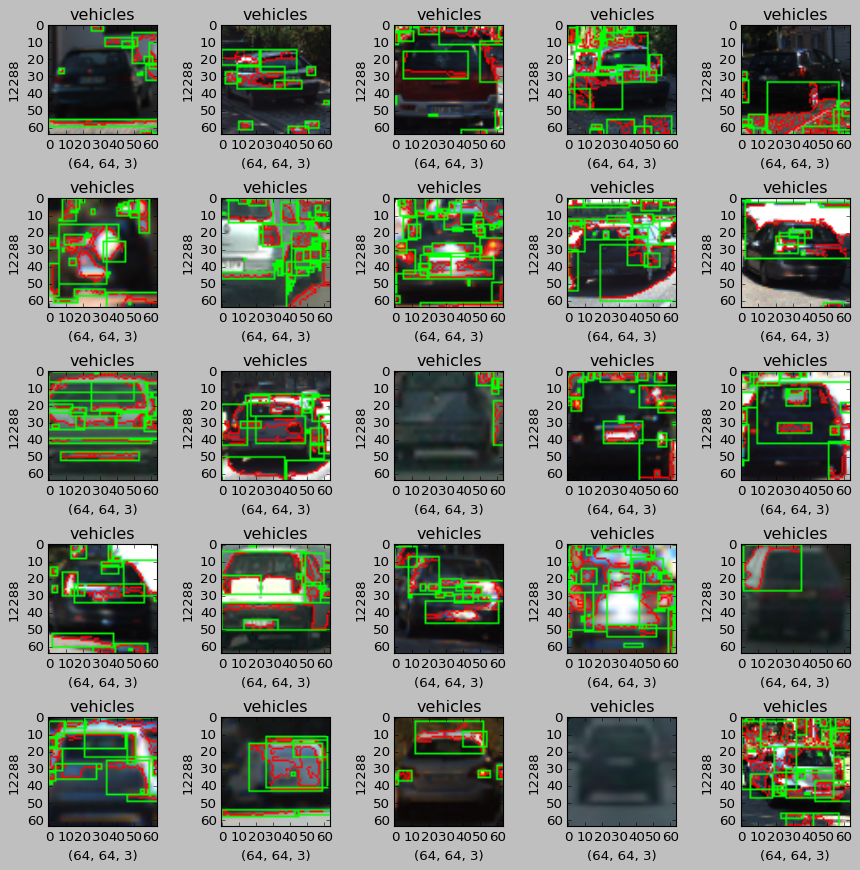

In [70]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(11,11))

for In_Image,sub in enumerate(axis.flat):
    Im_Exp = V_Img["PNG"][In_Image]
    Exp_Im = cv2.imread(Im_Exp)
    Exp_Im = cv2.cvtColor(Exp_Im,cv2.COLOR_BGR2RGB)
    _,Thre_Img = cv2.threshold(Exp_Im,100,255,cv2.THRESH_TOZERO_INV)
    C_IMG = cv2.Canny(Thre_Img,90,450)
    contours,_ = cv2.findContours(C_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    Draw_Img = cv2.drawContours(Exp_Im,contours,-1,(255,0,0),1)
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(Draw_Img,(x,y),(x+w,y+h),(0,255,0),1)
        
    sub.set_xlabel(Exp_Im.shape)
    sub.set_ylabel(Exp_Im.size)
    sub.set_title(V_Img["CATEGORY"][In_Image])
    sub.imshow(Exp_Im)
plt.tight_layout()
plt.show()

# IMAGE GENERATOR PROCESS

#### GENERATOR STRUCTURE

In [71]:
Train_IMG_Generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=25,
                                        shear_range=0.2,
                                        zoom_range=0.1,
                                        brightness_range=[0.2,0.8],
                                        horizontal_flip=True,
                                        validation_split=0.1)

In [72]:
Test_Image_Generator = ImageDataGenerator(rescale=1./255)

#### HOW TO LOOK BY GENERATOR

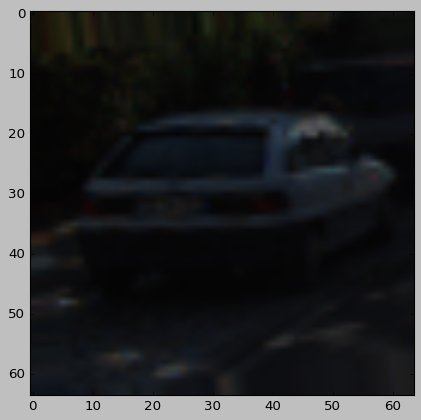

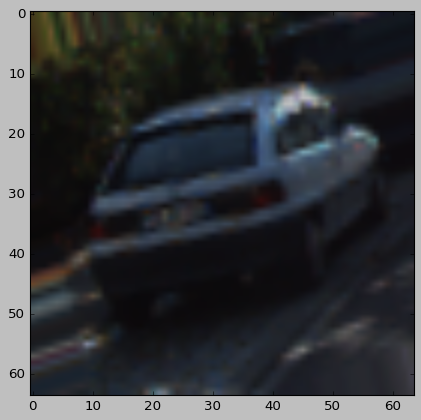

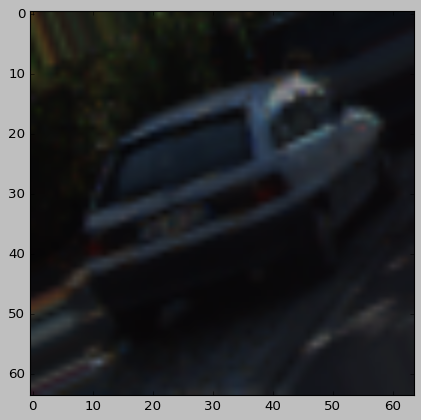

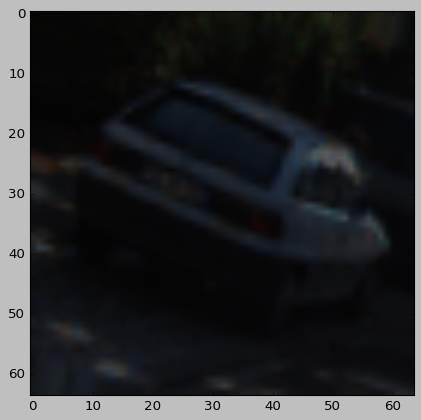

In [76]:
Example_Image = Main_Data["PNG"][2]
Load_Image = tf.keras.preprocessing.image.load_img(Example_Image,target_size=(64,64))
Array_Image = tf.keras.preprocessing.image.img_to_array(Load_Image)
Array_Image = Array_Image.reshape((1,)+Array_Image.shape)

i = 0

for batch in Train_IMG_Generator.flow(Array_Image,batch_size=32):
    plt.figure(i)
    Image = plt.imshow(tf.keras.preprocessing.image.img_to_array(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

#### APPLYING

In [77]:
Train_Set = Train_IMG_Generator.flow_from_dataframe(dataframe=Main_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                    target_size=(64,64),
                                                   class_mode="binary",
                                                   subset="training")

Found 15984 validated image filenames belonging to 2 classes.


In [78]:
Validaiton_Set = Train_IMG_Generator.flow_from_dataframe(dataframe=Main_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                    target_size=(64,64),
                                                   class_mode="binary",
                                                   subset="validation")

Found 1776 validated image filenames belonging to 2 classes.


In [79]:
Test_Set = Test_Image_Generator.flow_from_dataframe(dataframe=Main_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                    target_size=(64,64),
                                                   class_mode="binary",
                                                   shuffle=False)

Found 17760 validated image filenames belonging to 2 classes.


In [80]:
print("TRAIN: ")
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validaiton_Set.class_indices)
print(Validaiton_Set.classes[0:5])
print(Validaiton_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

TRAIN: 
{'no_vehicles': 0, 'vehicles': 1}
[0, 0, 1, 0, 0]
(64, 64, 3)
------------------------------------------------------------
VALIDATION: 
{'no_vehicles': 0, 'vehicles': 1}
[1, 0, 1, 1, 0]
(64, 64, 3)
------------------------------------------------------------
TEST: 
{'no_vehicles': 0, 'vehicles': 1}
[1, 0, 1, 1, 0]
(64, 64, 3)


# MODEL

#### STRUCTURE

In [81]:
Model = Sequential()

Model.add(SeparableConv2D(12,(3,3),activation="relu",
                 input_shape=(64,64,3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))

#
Model.add(SeparableConv2D(24,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.2))
Model.add(MaxPooling2D((2,2)))


#
Model.add(TimeDistributed(Flatten()))
Model.add(Bidirectional(LSTM(32,
                                  return_sequences=True,
                                  dropout=0.5,
                                  recurrent_dropout=0.5)))
Model.add(Bidirectional(GRU(32,
                                  return_sequences=True,
                                  dropout=0.5,
                                  recurrent_dropout=0.5)))

#
Model.add(Flatten())
Model.add(Dense(256,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(1,activation="sigmoid"))

In [82]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separable  (None, 62, 62, 12)       75        
 Conv2D)                                                         
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 12)       48        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 12)       0         
 )                                                               
                                                                 
 separable_conv2d_1 (Separab  (None, 31, 31, 24)       420       
 leConv2D)                                                       
                                                                 
 dropout (Dropout)           (None, 31, 31, 24)        0

In [83]:
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")

In [84]:
Model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [85]:
CNN_Model = Model.fit(Train_Set,
                      validation_data=Validaiton_Set,
                      callbacks=Call_Back,
                      epochs=50)

Epoch 1/50
500/500 [==============================] - 390s 720ms/step - loss: 0.2469 - accuracy: 0.8937 - val_loss: 0.1880 - val_accuracy: 0.9285
Epoch 2/50
500/500 [==============================] - 172s 344ms/step - loss: 0.1060 - accuracy: 0.9605 - val_loss: 0.0966 - val_accuracy: 0.9645
Epoch 3/50
500/500 [==============================] - 184s 367ms/step - loss: 0.0774 - accuracy: 0.9725 - val_loss: 0.1557 - val_accuracy: 0.9454
Epoch 4/50
500/500 [==============================] - 196s 391ms/step - loss: 0.0631 - accuracy: 0.9774 - val_loss: 0.0534 - val_accuracy: 0.9820
Epoch 5/50
500/500 [==============================] - 138s 275ms/step - loss: 0.0496 - accuracy: 0.9813 - val_loss: 0.0486 - val_accuracy: 0.9809
Epoch 6/50
500/500 [==============================] - 115s 231ms/step - loss: 0.0425 - accuracy: 0.9850 - val_loss: 0.0442 - val_accuracy: 0.9831
Epoch 7/50
500/500 [==============================] - 112s 224ms/step - loss: 0.0414 - accuracy: 0.9849 - val_loss: 0.0491 -

In [86]:
Model_Results = Model.evaluate(Test_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

555/555 [==============================] - 29s 53ms/step - loss: 0.0713 - accuracy: 0.9792
LOSS:  0.0713
ACCURACY:  0.98


In [87]:
Model.save("./Last_Model")

INFO:tensorflow:Assets written to: ./Last_Model\assets


INFO:tensorflow:Assets written to: ./Last_Model\assets


In [88]:
Model.save("Prediction_Model.h5")

In [89]:
Model.save_weights("Model_Weights.h5")

#### CONTROL

<AxesSubplot:>

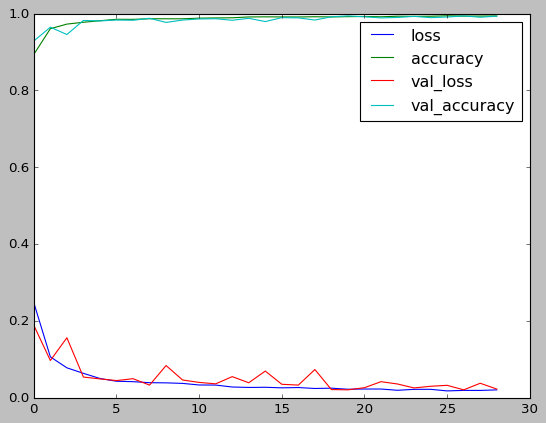

In [90]:
Grap_Data = pd.DataFrame(CNN_Model.history)
Grap_Data.plot()

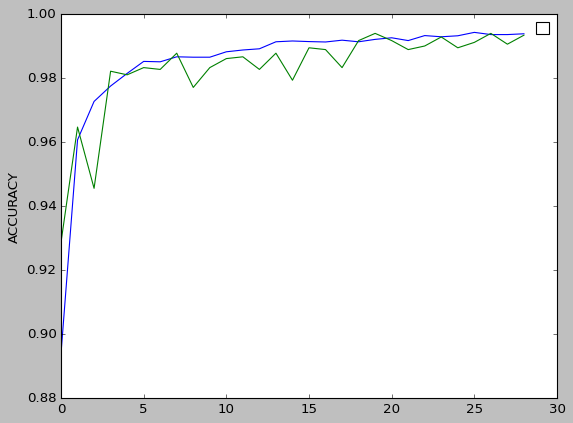

In [91]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

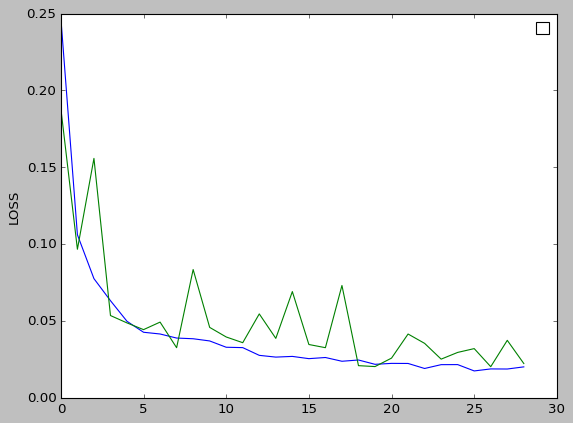

In [92]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

#### PREDICTION

In [95]:
Test_Prediction = Model.predict(Test_Set)


555/555 [==============================] - 40s 71ms/step


In [96]:
Test_Prediction_Class = (Model.predict(Test_Set) > 0.5).astype("int32")

555/555 [==============================] - 43s 78ms/step


In [97]:
print(Test_Prediction)

[[1.0000000e+00]
 [2.1286506e-02]
 [1.0000000e+00]
 ...
 [1.3244989e-08]
 [9.3860754e-06]
 [1.0000000e+00]]


In [98]:
Test_Prediction = Test_Prediction.argmax(axis=-1)

In [99]:
print(Test_Prediction)

[0 0 0 ... 0 0 0]


In [100]:
print(Test_Prediction_Class)

[[1]
 [0]
 [1]
 ...
 [0]
 [0]
 [1]]


* VEHICLE --> 1
* NO VEHICLE --> 0

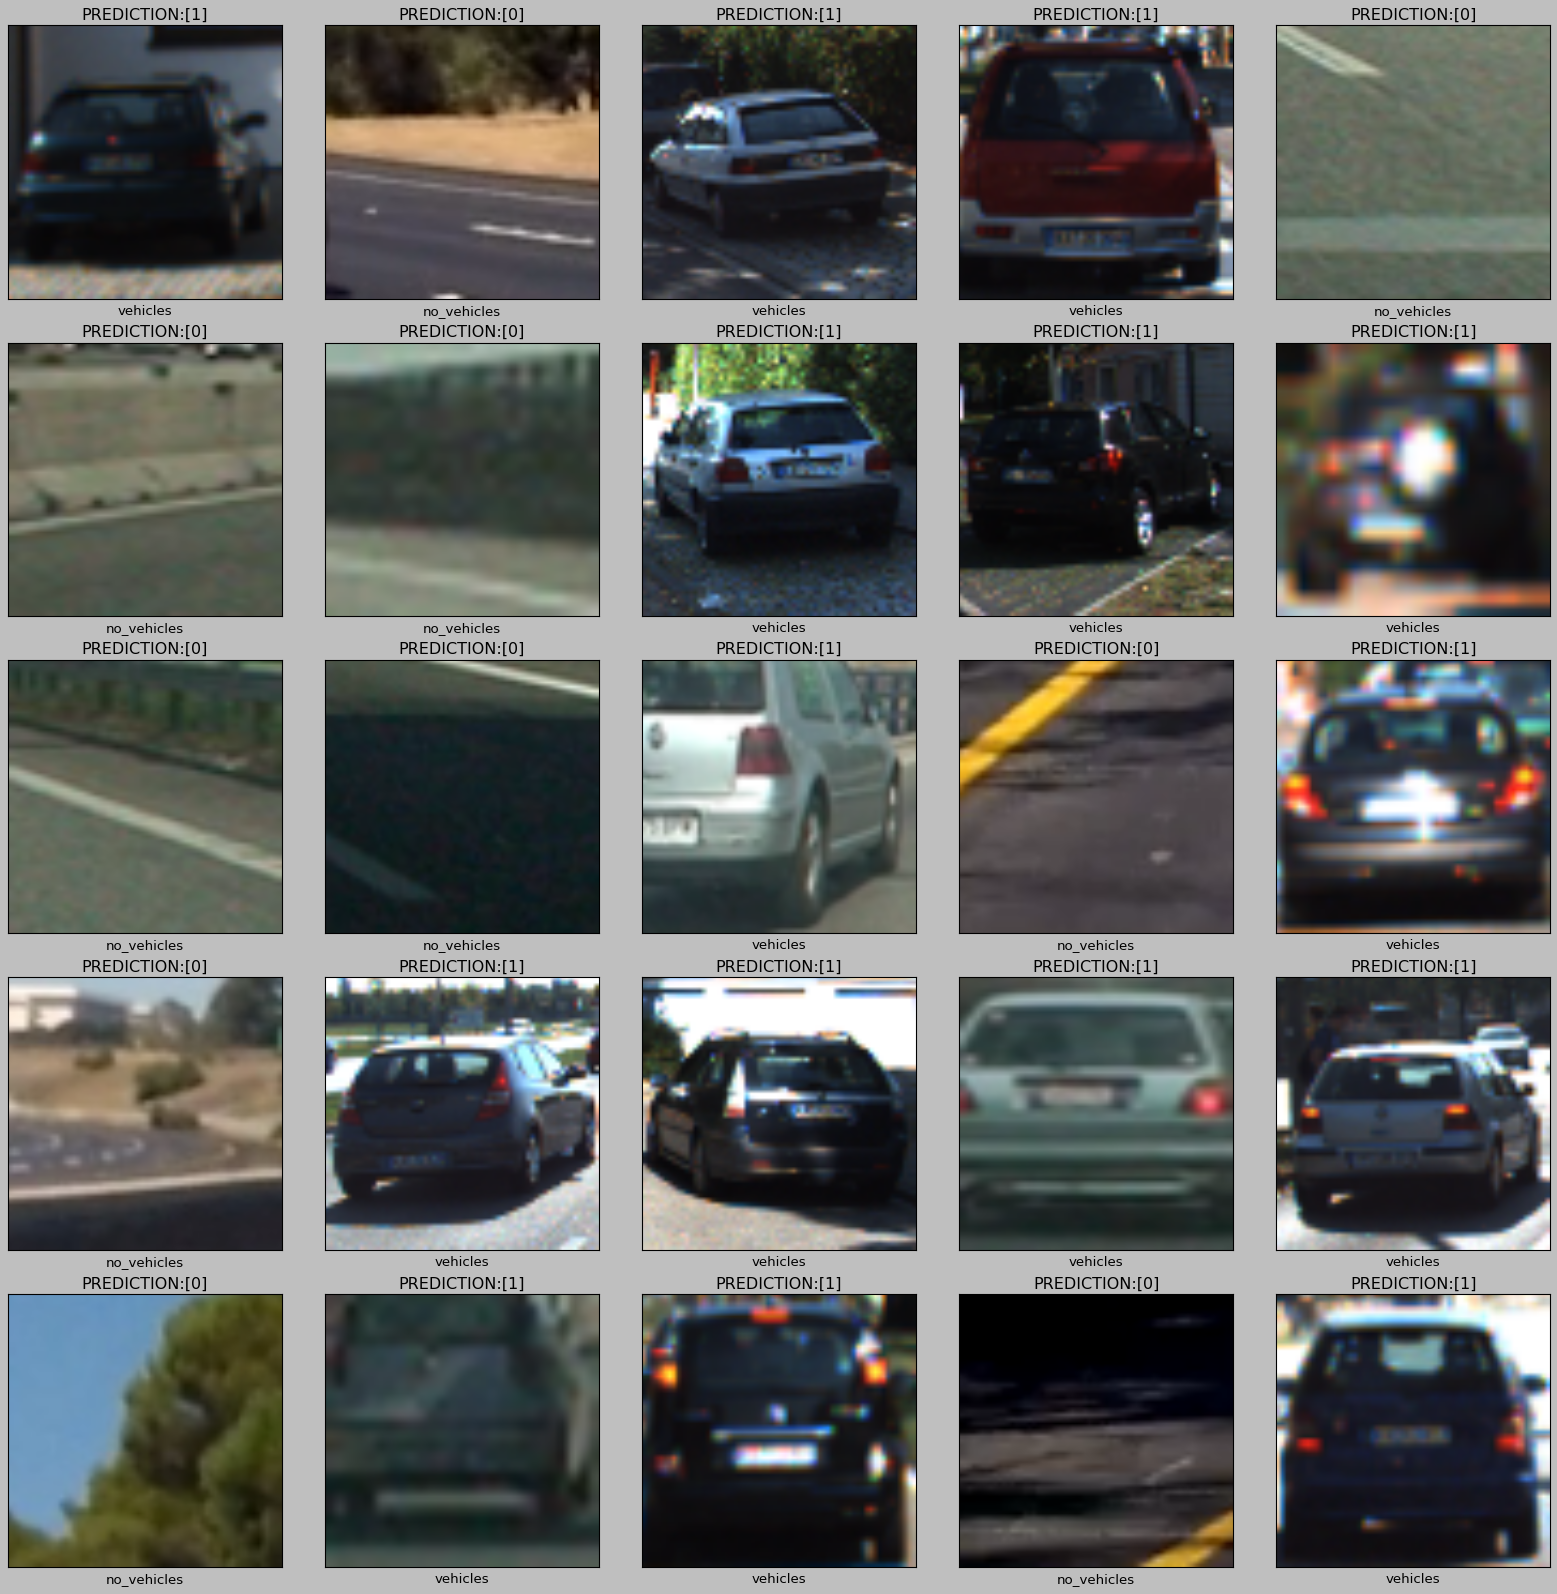

In [101]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data["PNG"].iloc[i]))
    ax.set_title(f"PREDICTION:{Test_Prediction_Class[i]}")
    ax.set_xlabel(Main_Data["CATEGORY"].iloc[i])
plt.tight_layout()
plt.show()

#### SPECIAL PREDICTION

In [102]:
v_img = "../input/vehicle-detection-image-set/data/vehicles/1.png"

In [103]:
non_v = "../input/vehicle-detection-image-set/data/non-vehicles/extra1039.png"

In [104]:
def searching_vehicle(img):
    Main_Img = cv2.imread(img)
    Array_Cr = np.asarray(Main_Img)
    Array_Cr = Array_Cr.reshape(1,Array_Cr.shape[0],Array_Cr.shape[1],Array_Cr.shape[2])
    heating = Model.predict_classes(Array_Cr)
    
    if heating[0][0] == 1:
        
        canny_Im = cv2.Canny(Main_Img,90,450)
        contours,_ = cv2.findContours(canny_Im,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        Draw_Img = cv2.drawContours(Main_Img,contours,-1,(255,0,0),1)
        plt.imshow(Draw_Img)
        
    elif heating[0][0] == 0:
        print("NO VEHICLE")

In [105]:
searching_vehicle(v_img)

IndexError: tuple index out of range

In [106]:
searching_vehicle(non_v)

IndexError: tuple index out of range